In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


**CMPE297 Sec98 Assigment 2**

**Samuel Yang**


## **VGG with (Cat and Dogs)**

In [17]:
# import libraries
from keras.models import Model
from keras.layers import Flatten, Dense, Lambda
from keras.applications.vgg16 import VGG16
from keras.optimizers import Adam
from keras.preprocessing import image

Using TensorFlow backend.


In [0]:

# set variables
gen = image.ImageDataGenerator()
batch_size = 64

In [19]:
batches = gen.flow_from_directory('dogscats/train',
                                  target_size=(224,224),
                                  class_mode='categorical',
                                  shuffle=True,
                                  batch_size=batch_size)

Found 202 images belonging to 2 classes.


In [21]:
val_batches = gen.flow_from_directory('dogscats/valid',
                                      target_size=(224,224),
                                      class_mode='categorical',
                                      shuffle=True,
                                      batch_size=batch_size)

Found 63 images belonging to 2 classes.


In [22]:
vgg = VGG16(include_top=True, weights='imagenet',
                               input_tensor=None, input_shape=(224,224,3), pooling=None)





553467904/553467096 [==============================] - 16s 0us/step








In [0]:
# set all layers to non-trainable
for layer in vgg.layers: layer.trainable=False

In [0]:
x = vgg.layers[-2].output
output_layer = Dense(2, activation='softmax', name='predictions')(x)

In [0]:
vgg2 = Model(inputs=vgg.input, outputs=output_layer)

In [27]:
vgg2.compile(optimizer=Adam(lr=0.001),
                loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
vgg2.fit_generator(batches,
                   steps_per_epoch = batches.samples // batch_size,
                   validation_data = val_batches, 
                   validation_steps = val_batches.samples // batch_size,
                   epochs = 1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/1
3/3 [==============================] - 89s 30s/step - loss: 0.8711 - acc: 0.5972 - val_loss: 0.2649 - val_acc: 0.8889


## **LeNet**

In [29]:
from keras.datasets import mnist
from keras.utils import np_utils
# Load dataset as train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Set numeric type to float32 from uint8
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize value to [0, 1]
x_train /= 255
x_test /= 255

# Transform lables to one-hot encoding
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# Reshape the dataset into 4D array
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

11493376/11490434 [==============================] - 1s 0us/step


In [30]:
from keras.models import Sequential
from keras import models, layers
import keras
#Instantiate an empty model
model = Sequential()

# C1 Convolutional Layer
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding='same'))

# S2 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# C3 Convolutional Layer
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# S4 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# C5 Fully Connected Convolutional Layer
model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
#Flatten the CNN output so that we can connect it with fully connected layers
model.add(layers.Flatten())

# FC6 Fully Connected Layer
model.add(layers.Dense(84, activation='tanh'))

#Output Layer with softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])

In [31]:
hist = model.fit(x=x_train,y=y_train, epochs=3, batch_size=128, validation_data=(x_test, y_test), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 85s 1ms/step - loss: 0.7126 - acc: 0.8171 - val_loss: 0.3487 - val_acc: 0.9052
Epoch 2/3
60000/60000 [==============================] - 85s 1ms/step - loss: 0.3175 - acc: 0.9108 - val_loss: 0.2667 - val_acc: 0.9257
Epoch 3/3
60000/60000 [==============================] - 86s 1ms/step - loss: 0.2577 - acc: 0.9274 - val_loss: 0.2273 - val_acc: 0.9368


In [32]:
test_score = model.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))


10000/10000 [==============================] - 6s 583us/step
Test loss 0.2273, accuracy 93.68%


Text(0, 0.5, 'acc')

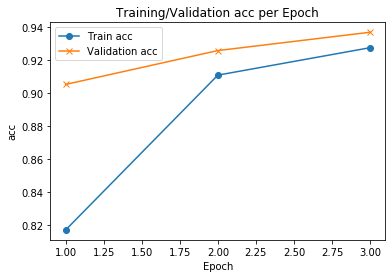

In [33]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + hist.history['acc'], 'o-')
ax.plot([None] + hist.history['val_acc'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

Text(0, 0.5, 'Loss')

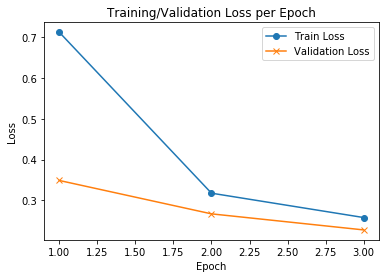

In [34]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_loss'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')